# <a href="https://miptstats.github.io/courses/mathstat_bmhf.html">Математическая статистика (ФБМФ, ФМХФ)</a>
## Домашнее задание 1 &mdash; часть B

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_st_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются **вообще никак**, кроме случаев наличия уважительной причины.
* До дедлайна можно поменять решение любое количество раз. Начинайте точно так же сдавать задание, бот подскажет.
* Любую уважительную причину нужно подтвердить документально, отправив скан или фото боту. При этом работу можно сдать позже на столько дней, на сколько время ее действия пересекается с временем выполнения задания.
* **По задаче 4** необходимо отправить **фото** в хорошем качестве (почерк, масштаб, освещенность, ориентация и т.д.). Фото плохого качества могут быть проигнорированы. Не LaTeX-формулы.
* **По задачам 5, 6** необходимо отправить **ноутбук в формате `ipynb` с выполненным кодом**. Другие форматы не принимаются.
* Выполнять задание необходимо **полностью самостоятельно**. При обнаружении списывания **все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Простой или основной уровень вы выбираете самостоятельно, выполняя или не выполняя задания типа B. При выборе **простого уровня** достаточно выполнить задания *типа A*. При выборе **основного уровня** нужно выполнять *как задания типа A, так и задания типа B*.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек. Ячейки с assert'ами **удалять и изменять нельзя**, в противном случае соответствующее задание не будет оценено.
* Комментарии к решению пишите в markdown-ячейках.
* Никакой код из данного задания при проверке запускаться не будет. **Если код студента не выполнен, недописан и т.д., то он не оценивается.**
* Каждая задача стоит **5 баллов**.

_Замечание: перед выполнением задания можно ознакомиться с <a href="https://miptstats.github.io/courses/mathstat_bmhf/seminar2.html">ноутбуком с семинара</a>._

In [1]:
# Bot check

# HW_ID: st_1b
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
from scipy.special import factorial, gammaln

### Задача 4

Оценку $\theta$ из задания 1.1 и оценку $a$ из задания 1.2 проверьте на несмещённость и состоятельность.

_Замечание: делайте необходимые пояснения по ходу доказательства._

### Утверждение:

Выборочное среднее $\overline{X}$ является несмещенной и состоятельной оценкой для теоретического среднего (математического ожидания)

### Доказательство:

Несмещённость:
$$\mathbb{E}{\overline{X}} = \mathbb{E}{\left(\frac{1}{n}\sum_{i=1}^n X_i\right)} = \frac{1}{n} \cdot \mathbb{E}\left(\sum_{i=1}^n X_i\right) = \mathbb{E}X_i$$
Состоятельность:

Согласно ЗБЧ в форме Хинчина 
$$\overline{X} = \frac{1}{n}\sum_{i=1}^n X_i \overset{P}{\longrightarrow} \mathbb{E}X_i \quad \blacksquare$$

__________________
### Задача 5

Загрузите данные об экспрессии гена FAM129A из файла `FAM129A.txt` с помощью функции `np.loadtxt`. Постройте гистограмму функцией `plt.hist`, указав в параметре `bins` оптимальное количество разбиений.

In [3]:
import pandas as pd

data = np.loadtxt('FAM129A.txt')
data = pd.DataFrame(data)
data

,0
0,5663.0
1,7016.0
2,7952.0
3,13862.0
4,4746.0
...,...
11683,414.0
11684,1404.0
11685,23674.0
11686,1419.0


In [4]:
sample = np.array(data)
N = len(sample)
N

11688

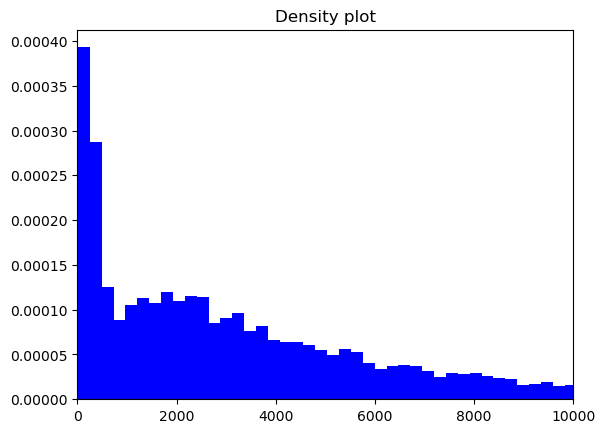

In [5]:
plt.hist(sample, bins=1000, density=True, color='blue')
plt.title('Density plot')
plt.xlim([0, 10_000]);

В предположении, что данные имеют пуассоновское распределение, найдите оценку максимального правдоподобия параметра распределения. Нарисуйте график дискретной плотности полученного распределения и сравните его с гистограммой. Хорошо ли оценка распределения приближает данные?

*Примечание:* для работы с распределениями случайных величин удобно пользоваться модулем <a href="https://miptstats.github.io/courses/python/07_random.html#2.-Работа-с-библиотекой-scipy.stats.">scipy.stats</a>.

Знаем, что выборочное среднее является несмещённой и состоятельной оценкой матожидания.

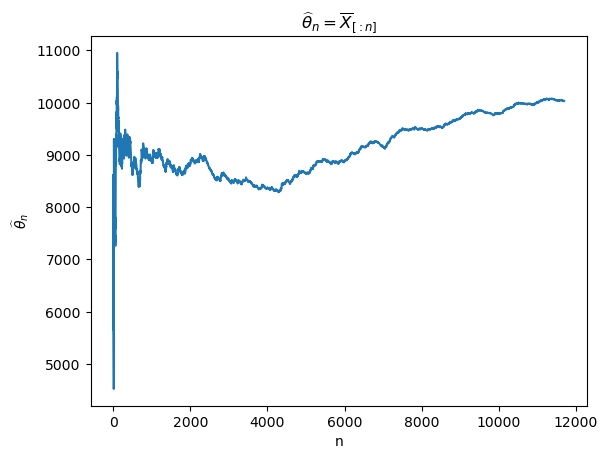

In [6]:
plt.plot(np.arange(1, N+1), np.cumsum(sample) / np.arange(1, N+1))
plt.xlabel('n')
plt.ylabel('$\widehat{\\theta}_n$')
plt.title('$\widehat{\\theta}_n = \overline{X}_{[:n]}$');

Посмотрим на $\widehat{\theta} = argmax(L(\theta|x))$

In [7]:
grid = np.linspace(9000, 11_000, 10_000)

In [8]:
theta = grid[np.argmax(sps.poisson.logpmf(sample.reshape((1, -1)), mu=grid.reshape((-1, 1))).sum(axis=1))]
theta

10034.503450345035

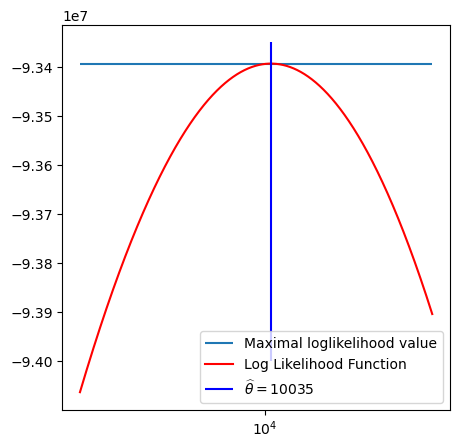

In [9]:
plt.figure(figsize=(5, 5))
maxllf = np.max(sps.poisson.logpmf(sample.reshape((1, -1)), mu=grid.reshape((-1, 1))).sum(axis=1))
plt.hlines(maxllf, xmin=np.min(grid), xmax=np.max(grid), label='Maximal loglikelihood value')
plt.plot(grid, sps.poisson.logpmf(sample.reshape((1, -1)), mu=grid.reshape((-1, 1))).sum(axis=1), label='Log Likelihood Function', color='red')
plt.vlines(theta, ymin=-9.4e7, ymax=-9.335e7, color='blue', label='$\widehat{\\theta}=%2.f$' %theta)
plt.xscale('asinh')
plt.legend(loc='lower right');

Наконец посмотрим, как приближение пуассоновским распределением с параметриом $\widehat{\theta}$ приближает выборку

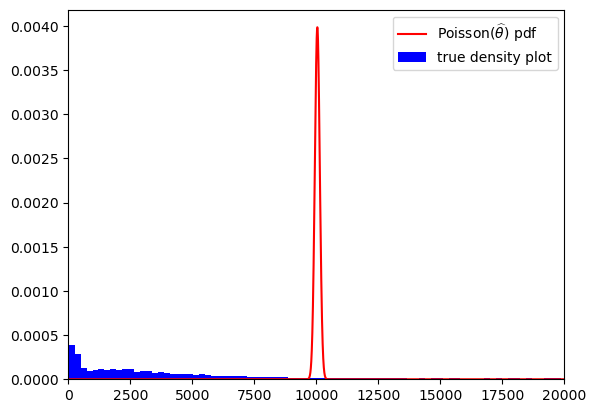

In [10]:
x = np.arange(0, 20_000, 1)
y = sps.poisson.pmf(x, mu=theta)
plt.plot(x, y, color='red', label='Poisson($\widehat{\\theta}$) pdf')
plt.hist(sample, bins=1000, density=True, color='blue', label='true density plot')
plt.xlim([0, 20_000])
plt.legend();

Хуже некуда... 

Вообще говоря, по изначальной гистограмме плотности значений выборке уже было понятно, что если уж использовать априорное распределение, то экспоненциальное

Проверим эту гипотезу

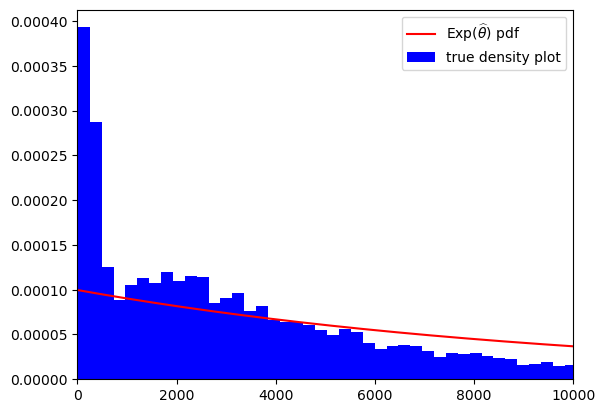

In [11]:
grid = np.linspace(9000, 11_000, 10_000)
theta = grid[np.argmax(sps.expon.logpdf(sample.reshape((1, -1)), scale=grid.reshape((-1, 1))).sum(axis=1))]
x = np.arange(0, 20_000, 1)
y = sps.expon.pdf(x, scale=theta)
plt.plot(x, y, color='red', label='Exp($\widehat{\\theta}$) pdf')
plt.hist(sample, bins=1000, density=True, color='blue', label='true density plot')
plt.xlim([0, 10_000])
plt.legend();

Значительно лучше. Конечно, это не означает, что данные из экспоненциального распределения, но во всяком случае, такое приближение имеет смысл

__________________
### Задача 6
Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $U[0, \theta]$. Рассмотрим оценки 
* $2\overline{X}$, 
* $(n+1) \min_i X_i$,
* $\min_i X_i + \max_i X_i$,
* $\frac{n+1}{n} \max_i X_i$. 

Вам необходимо сравнить эти оценки в равномерном подходе с квадратичной и линейной функциями потерь, построив графики функций риска при помощи моделирования.

Для каждого $\theta \in (0, 2]$ с шагом $0.01$ сгенерируйте $5000$ независимых выборок $X^1=\left(X^1_1, \dots, X^1_{100} \right), \dots, X^{5000} = \left(X^{5000}_1, \dots, X^{5000}_{100} \right)$ из распределения $U[0, \theta]$.

(см. <a href="https://miptstats.github.io/courses/mathstat_bmhf/seminar2.html#Задача-2.">пример с семинара</a>)

Рассмотрим одну из перечисленных выше оценок $\widehat{\theta}$. Посчитайте ее значение по каждой выборке. Тем самым, для данного $\theta$ получится $5000$ реализаций этой оценки $\widehat{\theta}_1, ..., \widehat{\theta}_{5000}$, где значение $\widehat{\theta}_j$ посчитано по реализации выборки $X^j$.

Теперь можно оценить функцию риска этой оценки с помощью усреднения
$$\widehat{R}_{\widehat{\theta}}(\theta) = \frac{1}{5000}\sum\limits_{j=1}^{5000} L\left(\widehat{\theta}_j, \theta\right),$$
где $L$ &mdash; одна из двух функций потерь: квадратичная $L(x, y)=(x-y)^2$ и линейная $L(x, y)=\left|x-y\right|$.

Для каждого из типов функций потерь постройте свой график. Нанесите на этот график для каждой из четырех оценок $\widehat{\theta}$ оценку функции потерь $\widehat{R}_{\widehat{\theta}}(\theta)$, пользуясь шаблоном ниже. Ограничение сверху по оси *y* ставьте таким, чтобы графики функции риска с малыми значениями четко различались.

*Совет*: при тестировании кода запускайте его с небольшими размерами данных. Например, используйте 100 реализаций выборок. Финальные результаты получите, поставив требуемые значения размеров данных.

В задаче допустимо использовать короткие циклы, то есть с малым количествои итераций.

In [12]:
theta_grid = np.arange(0.01, 2.01, 0.01)
theta_grid.shape

(200,)

In [13]:
samples = np.zeros((200, 5000, 100))
for i in range(200):
    samples[i] = sps.uniform.rvs(loc=0, scale=theta_grid[i], size=(5000, 100))

$$\widehat{\theta}_a = 2\overline{X}$$

In [14]:
theta_a = np.zeros((200, 5000))
for i in range(200):
    theta_a[i] = np.apply_along_axis(lambda x: 2 * np.mean(x), axis=1, arr=samples[i])

$$\widehat{\theta}_b = (n+1) \min_i X_i$$

In [15]:
theta_b = np.zeros((200, 5000))
for i in range(200):
    theta_b[i] = np.apply_along_axis(lambda x: (len(x)+1) * np.min(x), axis=1, arr=samples[i])

$$\widehat{\theta}_c = \min_i X_i + \max_i X_i$$

In [16]:
theta_c = np.zeros((200, 5000))
for i in range(200):
    theta_c[i] = np.apply_along_axis(lambda x: np.max(x) + np.min(x), axis=1, arr=samples[i])

$$\widehat{\theta}_d = \frac{n+1}{n} \max_i X_i$$ 

In [17]:
theta_d = np.zeros((200, 5000))
for i in range(200):
    theta_d[i] = np.apply_along_axis(lambda x: (len(x)+1) * np.max(x) / len(x), axis=1, arr=samples[i])

In [18]:
def Quadratic_Risk(est_thates, theta):
    return np.mean((est_thates - theta)**2)

In [19]:
def Absolute_Risk(est_thates, theta):
    return np.mean(np.abs(est_thates - theta))

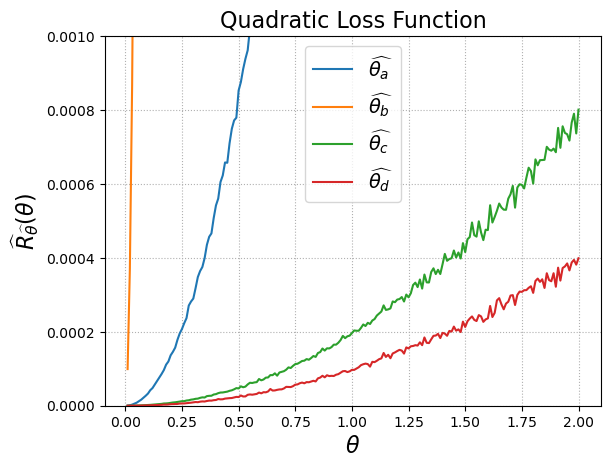

In [20]:
plt.plot(theta_grid, [Quadratic_Risk(theta_a[i], theta_grid[i]) for i in range(200)], label='$\widehat{\\theta_a}$')
plt.plot(theta_grid, [Quadratic_Risk(theta_b[i], theta_grid[i]) for i in range(200)], label='$\widehat{\\theta_b}$')
plt.plot(theta_grid, [Quadratic_Risk(theta_c[i], theta_grid[i]) for i in range(200)], label='$\widehat{\\theta_c}$')
plt.plot(theta_grid, [Quadratic_Risk(theta_d[i], theta_grid[i]) for i in range(200)], label='$\widehat{\\theta_d}$')
plt.grid(ls=':')
plt.xlabel('$\\theta$', fontsize=16)
plt.ylabel('$\\widehat{R}_{\\widehat{\\theta}}(\\theta)$', fontsize=16)
plt.legend(fontsize=14)
plt.title('Quadratic Loss Function', fontsize=16)
plt.ylim(0, 0.001);

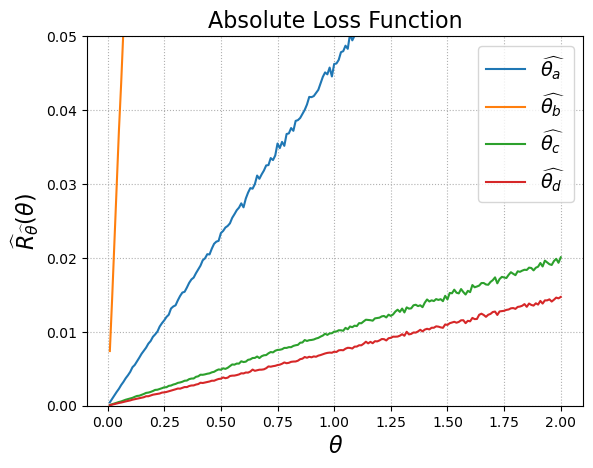

In [21]:
plt.plot(theta_grid, [Absolute_Risk(theta_a[i], theta_grid[i]) for i in range(200)], label='$\widehat{\\theta_a}$')
plt.plot(theta_grid, [Absolute_Risk(theta_b[i], theta_grid[i]) for i in range(200)], label='$\widehat{\\theta_b}$')
plt.plot(theta_grid, [Absolute_Risk(theta_c[i], theta_grid[i]) for i in range(200)], label='$\widehat{\\theta_c}$')
plt.plot(theta_grid, [Absolute_Risk(theta_d[i], theta_grid[i]) for i in range(200)], label='$\widehat{\\theta_d}$')
plt.grid(ls=':')
plt.xlabel('$\\theta$', fontsize=16)
plt.ylabel('$\\widehat{R}_{\\widehat{\\theta}}(\\theta)$', fontsize=16)
plt.legend(fontsize=14)
plt.title('Absolute Loss Function', fontsize=16)
plt.ylim(0, 0.05);

    Сделайте вывод о том, какая оценка лучше и в каком подходе.

**Вывод:** 
Как в квадратичном, так и в линейном(абсолютном) подходе худшей оказывается оценка $\widehat{\theta}_b = (n+1) \min_i X_i$ (её Loss очень велик).

За ней следует оценка $\widehat{\theta}_a = 2\overline{X}$. 

Лидерами оказываются оценки $\widehat{\theta}_c = \min_i X_i + \max_i X_i$ и $\widehat{\theta}_d = \frac{n+1}{n} \max_i X_i$, причём последняя является наилучшей(с наименьшим Loss).

На самом деле, такое соотнощение между эмпирическими рисками оценок следует из теоретических рисков:
$$X \sim U[0, \theta] \implies DX_i = \frac{\theta^2}{12}$$
Далее $X_{(1)} := \min_i X_i, \quad  X_{(n)} := \max_i X_i$ 


1) Оценка $\theta^* = 2\overline{X}$ несмещённая, значит,
$$E(\theta^* - \theta)^2 = D\theta^* = D(2\overline{X}) = 4\cdot D\overline{X} = 4\frac{DX_1}{n} = 4\cdot \frac{\theta^2}{12n} = \frac{\theta^2}{3n}$$
2) Оценка $(n+1)X_{(1)}$ несмещённая, значит, 
$$E(\theta^* - \theta)^2 = D\theta^* = D\left((n+1)X_{(1)}\right) = (n+1)^2\cdot DX_{(1)}$$
Но $DX_{(1)} = DX_{(n)} = \frac{n\cdot\theta^2}{(n+2)(n+1)^2}$. Итого:
$$D\left((n+1)X_{(1)}\right) = \frac{n}{n+2}\cdot \theta^2$$
3) Оценка $\theta^* = X_{(1)}+X_{(n)}$ несмещённая, значит, 
$$E(\theta^* - \theta)^2 = D\theta^* = D\left(X_{(1)}+X_{(n)}\right) = DX_{(1)} + DX_{(n)} + 2\cdot cov(X_{(1)}, X_{(n)})$$
Притом $E(X_{(1)} \cdot X_{(n)}) = \frac{\theta^2}{n+2}$. Откуда $cov(X_{(1)}, X_{(n)}) = E(X_{(1)} \cdot X_{(n)}) - E(X_{(1)}) \cdot E(X_{(n)}) = \frac{\theta^2}{(n+2)(n+1)^2}$. Итого:
$$D\theta^* = \frac{2}{(n+1)(n+2)}\theta^2$$
4) Оценка $\frac{n+1}{n} X_{(n)}$ несмещённая, значит, 
$E(\theta^* - \theta)^2 = D\theta^* = D\left(\frac{n+1}{n} X_{(n)}\right) = \frac{(n+1)^2}{n^2}DX_n = \frac{(n+1)^2}{n^2} \cdot \frac{n\cdot\theta^2}{(n+2)(n+1)^2} = \frac{\theta^2}{n(n+2)}$


Несложно убедиться, что при n = 5000
$$\frac{n\theta^2}{n+2} \geqslant \frac{\theta^2}{3n} \geqslant \frac{2\theta^2 }{(n+1)(n+2)} \geqslant \frac{\theta^2}{n(n+2)}$$